# Recurrent Neural Networks in Keras

In [2]:
# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# display multiple outputs within a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all";

import warnings
warnings.filterwarnings('ignore');

# TensorFlow and tf.keras
from tensorflow import keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.12.0


The densely connected neural nets and convnets we've seen so far have no memory - they're feedforward networks since they process entire sequences elements at once <br>
<br>
A recurrent neural network takes the whole sequence as input but loops over sequence elements <br>
<br>
There's a state of the RNN which is the output of the previous iteration

In [7]:
# basic RNN to process one sequence using Numpy

timesteps = 100

# input, output dimensions
input_features = 32
output_features = 64

# random noise for example
inputs = np.random.random((timesteps, input_features))

# set initial state
state_t = np.zeros((output_features,))

# create random weight matrices
W = np.random.random((output_features, input_features))
U = np.random.random((output_features, output_features))
b = np.random.random((output_features,))

successive_outputs = []

# input is vector of shape (input_features,)
for input_t in inputs:
    # loop uses input and state to compute output using this step/activation function
    output_t = np.tanh(np.dot(W, input_t) + np.dot(U, state_t) + b)
    successive_outputs.append(output_t)
    state_t = output_t

# final output shape is (timesteps, output features)
final_output_sequence = np.concatenate(successive_outputs, axis=0)

Final output is 2D tensor of shape (timesteps, output features), where each timestep is output of loop at time t. Output at time t contains information about timesteps 0 to t, so only need last output and not entire sequence.

## SimpleRNN

In [9]:
from tensorflow.keras.layers import SimpleRNN

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN

model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 32)          320000    
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 32)                2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [10]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, None, 32)          2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [11]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32))  # This last layer only returns the last outputs.
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_4 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_5 (SimpleRNN)     (None, 32)                2080      
Total params: 328,320
Trainable params: 328,320
Non-trainable params: 0
_________________________________________________________________


In [13]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence

max_features = 10000  # number of words to consider as features
maxlen = 500  # cut texts after this number of words (among top max_features most common words)
batch_size = 32

print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')

# preprocess so all sequences same length
print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


In [16]:
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=5,
                    batch_size=128,
                    validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/5
20000/20000 [==============================] - 24s 1ms/step - loss: 0.5484 - acc: 0.7131 - val_loss: 0.4803 - val_acc: 0.7748
Epoch 2/5
20000/20000 [==============================] - 23s 1ms/step - loss: 0.3499 - acc: 0.8569 - val_loss: 0.3694 - val_acc: 0.8472
Epoch 3/5
20000/20000 [==============================] - 23s 1ms/step - loss: 0.2632 - acc: 0.8986 - val_loss: 0.6564 - val_acc: 0.7866
Epoch 4/5
20000/20000 [==============================] - 23s 1ms/step - loss: 0.2100 - acc: 0.9215 - val_loss: 0.3768 - val_acc: 0.8390
Epoch 5/5
20000/20000 [==============================] - 24s 1ms/step - loss: 0.1660 - acc: 0.9405 - val_loss: 0.3635 - val_acc: 0.8584


SimpleRNN doesn't do a great job with long text sequences compared to baseline from chapter 3.

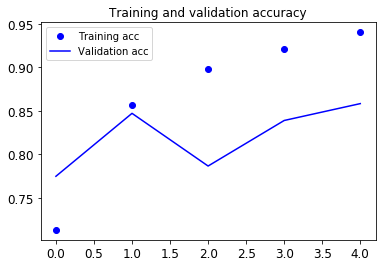

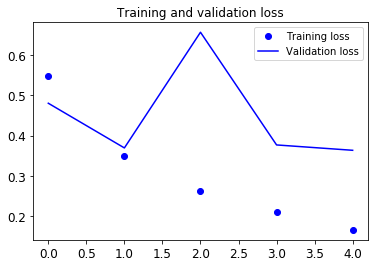

In [19]:
# plot training/validation accuracy
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show();

## LSTM recurrent layers

For SimpleRNN, long term dependencies between inputs many timesteps away become impossible to learn - called the *Vanishing Gradient problem*

LSTM - Long short term memory is another recurrent network that carries information from previous iterations alongside the network like a conveyor belt, preserving more information about long term relationships

In [21]:
from tensorflow.keras.layers import LSTM

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(input_train, 
                    y_train,
                    epochs=5,
                    batch_size=128,
                    validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/5
20000/20000 [==============================] - 82s 4ms/step - loss: 0.5216 - acc: 0.7528 - val_loss: 0.4312 - val_acc: 0.8274
Epoch 2/5
20000/20000 [==============================] - 77s 4ms/step - loss: 0.2993 - acc: 0.8843 - val_loss: 0.3451 - val_acc: 0.8712
Epoch 3/5
20000/20000 [==============================] - 70s 4ms/step - loss: 0.2370 - acc: 0.9113 - val_loss: 0.4276 - val_acc: 0.8350
Epoch 4/5
20000/20000 [==============================] - 71s 4ms/step - loss: 0.2060 - acc: 0.9251 - val_loss: 0.2816 - val_acc: 0.8908
Epoch 5/5
20000/20000 [==============================] - 70s 4ms/step - loss: 0.1818 - acc: 0.9350 - val_loss: 0.2869 - val_acc: 0.8854


Still LSTM doesn't do much better than baseline dense neural net from chapter 3 - sentiment analysis in this case is simple enough to solve well just using word frequency counts. <br>
<br>
LSTM does a lot better on problems like question answering/machine translation